# Описание данных:

Данные содержат информацию о показателях здоровья, собранных с умных часов.

### Структура данных:

| Название столбца            | Описание                                        |
|-----------------------------|-------------------------------------------------|
| **User ID**                 | Уникальный идентификатор пользователя           |
| **Heart Rate (BPM)**        | Частота сердечных сокращений (ударов в минуту)  |
| **Blood Oxygen Level (%)**  | Уровень насыщения крови кислородом              |
| **Step Count**              | Количество шагов за период                      |
| **Sleep Duration (hours)**  | Продолжительность сна в часах                   |
| **Activity Level**          | Уровень активности пользователя                 |
| **Stress Level**            | Уровень стресса (шкала от 1 до 10)              |

Данный датасет взят с сайта https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned/data

# Подключение библиотек

In [ ]:
# подключение библиотеки pandas
import pandas as pd 
# подключение библиотеки matplotlib.pyplot
import matplotlib.pyplot as plt
# подключение библиотеки seaborn
import seaborn as sns

# Чтение и вывод данных

In [2]:
# читаем исходный DataFrame (df) из файла
df = pd.read_csv("data/unclean_smartwatch_health_data.csv")
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


# Подготовка и группировка данных 

### Подсчет доли отсутствующих значений

In [3]:
df.isna().mean().sort_values(ascending=False) 

Heart Rate (BPM)          0.0400
Blood Oxygen Level (%)    0.0300
User ID                   0.0201
Stress Level              0.0200
Activity Level            0.0200
Sleep Duration (hours)    0.0150
Step Count                0.0100
dtype: float64

### проверяем типы данных по столбцам

In [4]:
df.dtypes

User ID                   float64
Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)     object
Activity Level             object
Stress Level               object
dtype: object

### Проверяем размер DataFrame

In [5]:
len(df)

10000

## Проводим группировку в столбце Activity Level

#### Просмотр изначальных значений в столбце Activity Level

In [8]:
df['Activity Level'].value_counts(dropna=False)

Activity Level
Seddentary       1676
Sedentary        1657
Highly Active    1650
Active           1643
Actve            1622
Highly_Active    1552
NaN               200
Name: count, dtype: int64

#### Функция для нормализации значений в столбце Activity Level

In [9]:
def activity_level_group(x):
  if x in ['Highly_Active', 'Highly Active']:    # исправляем опечатки
    return 'Highly Active'                       # и
  if x in ['Seddentary', 'Sedentary']:           # приводим  к общему 
    return 'Sedentary'                           # виду значения в столбце
  if x in ['Actve', 'Active']:
    return 'Active'
  return x

### Вызываем функцию для нормализации значений и выводим новые уникальные значения

In [10]:
df['Activity Level'] = df['Activity Level'].apply(activity_level_group)  # вызов функции
df['Activity Level'].value_counts(dropna=False)

Activity Level
Sedentary        3333
Active           3265
Highly Active    3202
NaN               200
Name: count, dtype: int64

## Разбиение числовых данных

### Создаем функцию для разбиения числовых данных

In [ ]:
def grouping_column(name_of_origin_column, name_of_new_column ,interval_boundaries, interval_labels):
   # преобразуем данные в числовой формат и копируем в новый столбец
   df[name_of_new_column] = pd.to_numeric(df[name_of_origin_column], errors='coerce')
   # Разделяем значения нового столбца на интервалы (диапазоны) с помощью функции pd.cut()
   df[name_of_new_column] = pd.cut(
      df[name_of_new_column],         # Столбец, который нужно разделить на интервалы
      bins = interval_boundaries,     # Границы интервалов
      labels = interval_labels,       # Метки для интервалов
      right = False                   # Указывает, что правая граница интервала не включается 
   ) 

### Столбец Heart Rate (BPM)

#### Просмотр значений в столбце Heart Raate (BPM)

In [11]:
df['Heart Rate (BPM)'].value_counts(dropna=False)

Heart Rate (BPM)
NaN           400
40.000000      84
104.227891      1
66.629712       1
72.539956       1
             ... 
61.367198       1
83.545119       1
58.797407       1
72.505887       1
79.062632       1
Name: count, Length: 9518, dtype: int64

#### Создаем новый столбец Heart Rate (BPM) Category

In [ ]:
grouping_column('Heart Rate (BPM)',                # Имя исходного столбца
                'Heart Rate (BPM) Category',       # имя нового столбца 
                [0, 50, 60, 70, 80 , 90, 100, 200, 300],     # границы интервалов
                ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-200', '200+']    # метки интервалов
                ) 

#### Просмотр значений в столбце Heart Rate (BPM) Category

In [13]:
df['Heart Rate (BPM) Category'].value_counts(dropna=False)

Heart Rate (BPM) Category
70-80      2481
60-70      2045
80-90      2013
50-60      1080
90-100     1044
100-200     469
0-50        418
NaN         400
200+         50
Name: count, dtype: int64

### Столбец Blood Oxygen Level (%)

#### Просмотр значений в столбце Blood Oxygen Level (%)

In [14]:
df['Blood Oxygen Level (%)'].value_counts(dropna=False)

Blood Oxygen Level (%)
100.000000    1526
NaN            300
98.809650        1
98.532195        1
97.052954        1
              ... 
98.931927        1
95.773035        1
97.945874        1
98.401058        1
98.475606        1
Name: count, Length: 8176, dtype: int64

#### Создаем новый столбец Blood Oxygen Level (%) Category

In [ ]:
grouping_column('Blood Oxygen Level (%)',                 # Имя исходного столбца
                'Blood Oxygen Level (%) Category',        # имя нового столбца 
                [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101],             # границы интервалов
                ['90-91', '91-92', '92-93', '93-94', '94-95', '95-96', '96-97', '97-98', '98-99', '99-100']  # метки интервалов
                )

#### Просмотр значений в столбце Blood Oxygen Level (%) Category

In [17]:
df['Blood Oxygen Level (%) Category'].value_counts(dropna=False)

Blood Oxygen Level (%) Category
99-100    3045
97-98     1830
98-99     1825
96-97     1459
95-96      895
94-95      434
NaN        300
93-94      163
92-93       37
91-92       11
90-91        1
Name: count, dtype: int64

### Столбец Step Count

#### Просмотр значений в столбце Step Count

In [15]:
df['Step Count'].value_counts(dropna=False)

Step Count
NaN             100
6155.837342       1
1608.956974       1
3790.054978       1
761.022604        1
               ... 
359.210435        1
9876.362934       1
13613.886293      1
2301.753065       1
1748.197069       1
Name: count, Length: 9901, dtype: int64

#### Создаем новый столбец Step Count Category

In [ ]:
grouping_column('Step Count',             # Имя исходного столбца
                'Step Count Category',            # имя нового столбца
                [0, 2000, 4000, 6000, 8000, 10000, 200000],          # границы интервалов
                ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000+'])    # метки интервалов

#### Просмотр значений в столбце Step Count Category

In [17]:
df['Step Count Category'].value_counts(dropna=False)

Step Count Category
0-2000        2455
10000+        2391
2000-4000     1793
4000-6000     1422
6000-8000     1044
8000-10000     795
NaN            100
Name: count, dtype: int64

### Столбец Sleep Duration (hours)

#### Просмотр значений в столбце Sleep Duration (hours)

In [21]:
df['Sleep Duration (hours)'].value_counts(dropna=False)

Sleep Duration (hours)
ERROR                 247
NaN                   150
8.19909228367997        1
8.378342673824589       1
5.691001039740254       1
                     ... 
8.035879532058063       1
3.691697829588543       1
7.1777328749799185      1
7.301008773588672       1
6.751333320225251       1
Name: count, Length: 9605, dtype: int64

#### Создаем новый столбец Sleep Duration (hours) Category

In [20]:
grouping_column('Sleep Duration (hours)',                           # Имя исходного столбца
                'Sleep Duration (hours) Category',                      # имя нового столбца
                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],                # границы интервалов
                ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+']    # метки интервалов
                )

#### Просмотр значений в столбце Sleep Duration (hours) Category

In [22]:
df['Sleep Duration (hours) Category'].value_counts(dropna=False)

Sleep Duration (hours) Category
6-7     2479
5-6     2069
7-8     1932
8-9     1089
4-5     1057
9-10     421
NaN      398
3-4      383
10+       86
2-3       74
1-2       11
0-1        1
Name: count, dtype: int64

# Предварительная визуализация

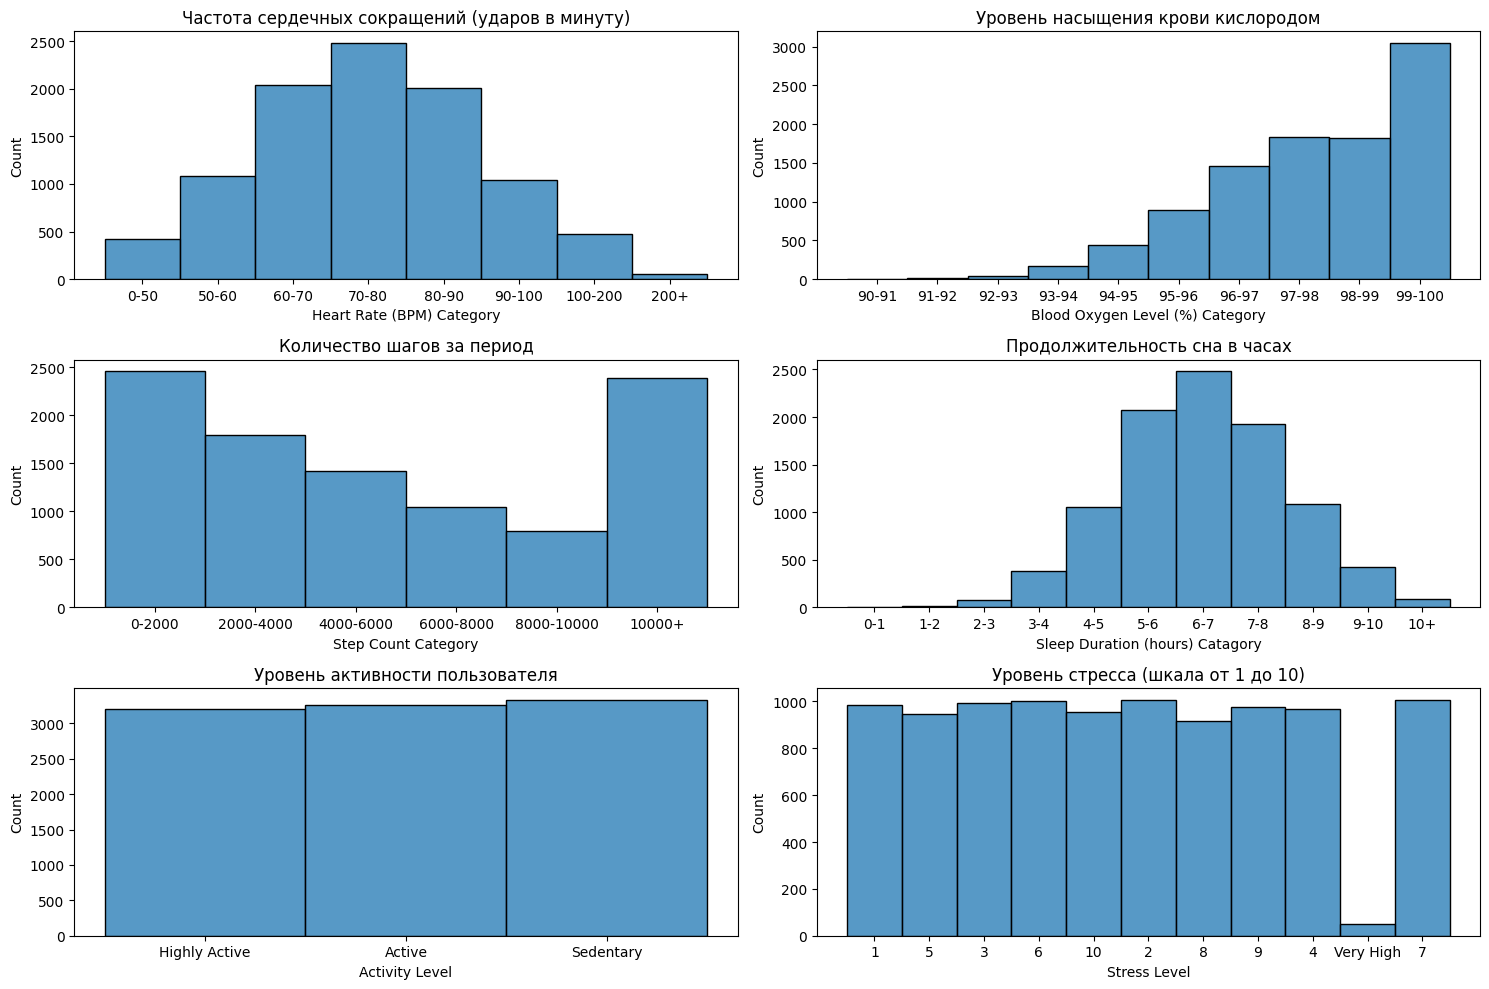

In [ ]:
# Создание сетки графиком
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# строим гистрограммы для каждого столбца DataFrame, где указывается столбец DataFrame и положение в сетки
sns.histplot(df['Heart Rate (BPM) Category'], ax = axes[0][0])
sns.histplot(df['Blood Oxygen Level (%) Category'], ax = axes[0][1])
sns.histplot(df['Step Count Category'], ax = axes[1][0])
sns.histplot(df['Sleep Duration (hours) Catagory'], ax = axes[1][1])
sns.histplot(df['Activity Level'], ax = axes[2][0])
sns.histplot(df['Stress Level'], ax = axes[2][1])
# для каждого графика в сетке задаем заголовок
axes[0][0].set_title('Частота сердечных сокращений (ударов в минуту)')
axes[0][1].set_title('Уровень насыщения крови кислородом')
axes[1][0].set_title('Количество шагов за период')
axes[1][1].set_title('Продолжительность сна в часах')
axes[2][0].set_title('Уровень активности пользователя')
axes[2][1].set_title('Уровень стресса (шкала от 1 до 10)')
plt.tight_layout()          # задаем автоматическую настройку расположения графиком
plt.show()        # отображаем все графики на экране

**Вывод** : на основе этих диаграмма можно наглядно увидеть какие данные в каждом столбце

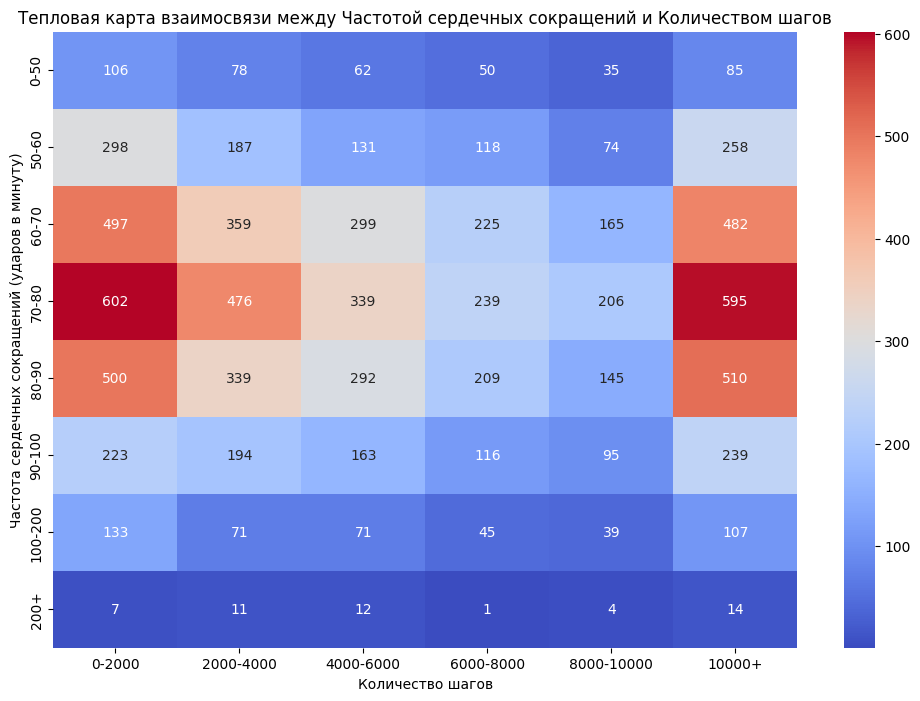

In [22]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df,  
    index="Heart Rate (BPM) Category",  # индекс сводной таблицы
    columns="Step Count Category",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Тепловая карта взаимосвязи между Частотой сердечных сокращений и Количеством шагов")    # задает заголовок
plt.xlabel("Количество шагов")     # добавляет подпись к оси x
plt.ylabel("Частота сердечных сокращений (ударов в минуту)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта наглядно демонстрирует зависимость между уровнем физической активности (количеством шагов) и частотой сердечных сокращений. В целом наблюдается тенденция к увеличению частоты сердечных сокращений по мере роста активности, хотя основная масса данных сосредоточена в диапазоне средней активности и средних значений частоты сердечных сокращений. Дальнейший анализ поможет выявить возможные аномалии и уточнить закономерности.

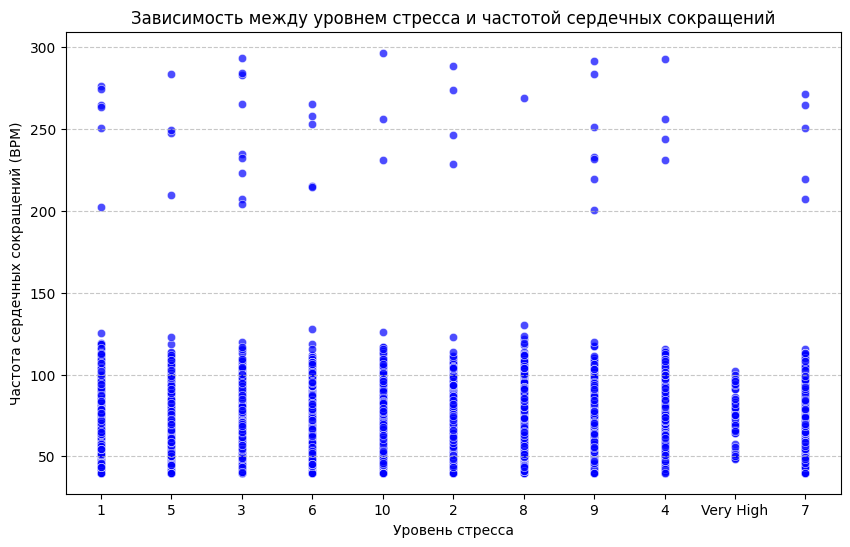

In [23]:
# Создаем новый график с указанными размерами (ширина: 10, высота: 6)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,    # используемые данные
    x="Stress Level",   # ось X представляет уровень стресса
    y="Heart Rate (BPM)",   # ось Y представляет частоту сердечных сокращений (в ударах в минуту)
    alpha=0.7,          # устанавливаем прозрачность точек для лучшей читаемости графика
    color='blue'        # задаем цвет точек на графике
)
# Добавляем заголовок графика
plt.title("Зависимость между уровнем стресса и частотой сердечных сокращений")
# Подписываем ось X (горизонтальная) как "Уровень стресса"
plt.xlabel("Уровень стресса")
# Подписываем ось Y (вертикальная) как "Частота сердечных сокращений (BPM)"
plt.ylabel("Частота сердечных сокращений (BPM)")
# Добавляем сетку по оси Y для удобства чтения значений
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Отображаем график на экране
plt.show()

**Вывод:** Уровень стресса влияет на частоту сердечных сокращений. Разброс данных увеличивается с ростом стресса: при высоком уровне стресса реакция организма становится менее предсказуемой. Возможность наличия выбросов: точки, сильно отличающиеся от основной тенденции, требуют дополнительного анализа для выявления причин их возникновения.

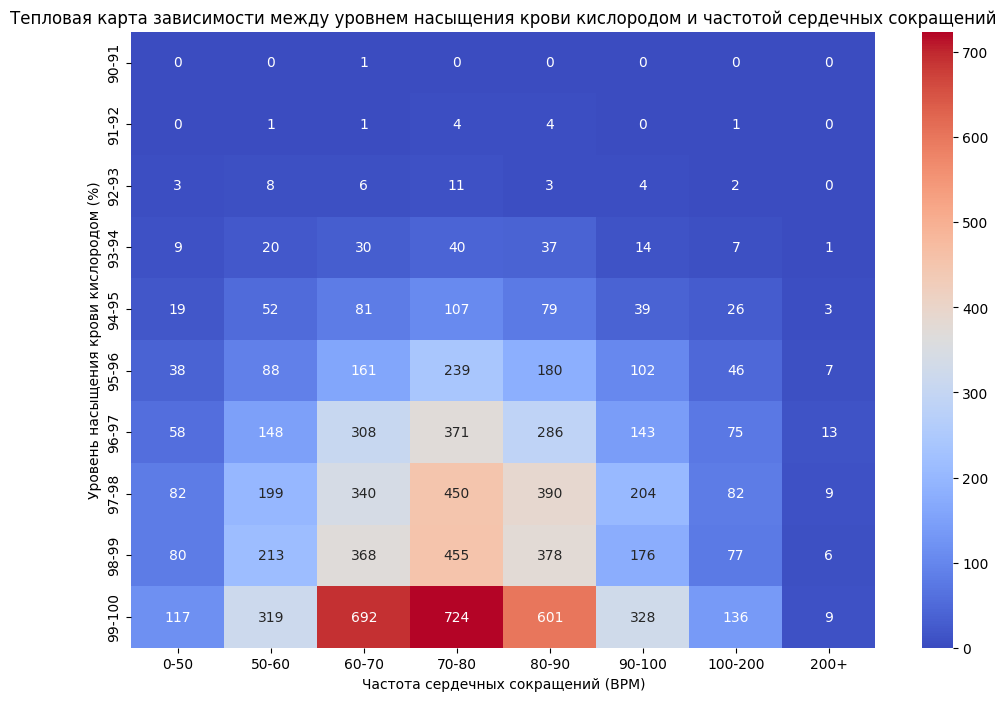

In [24]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df,  
    index="Blood Oxygen Level (%) Category",  # индекс сводной таблицы
    columns="Heart Rate (BPM) Category",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Тепловая карта зависимости между уровнем насыщения крови кислородом и частотой сердечных сокращений")    # задает заголовок
plt.xlabel("Частота сердечных сокращений (BPM)")     # добавляет подпись к оси x
plt.ylabel("Уровень насыщения крови кислородом (%)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта показывает, что у большинства пользователей нормальные физиологические показатели (уровень насыщения крови кислородом около 95–97% и частота сердечных сокращений в диапазоне 60–80 ударов в минуту ). Аномальные значения встречаются редко и могут указывать на патологии.

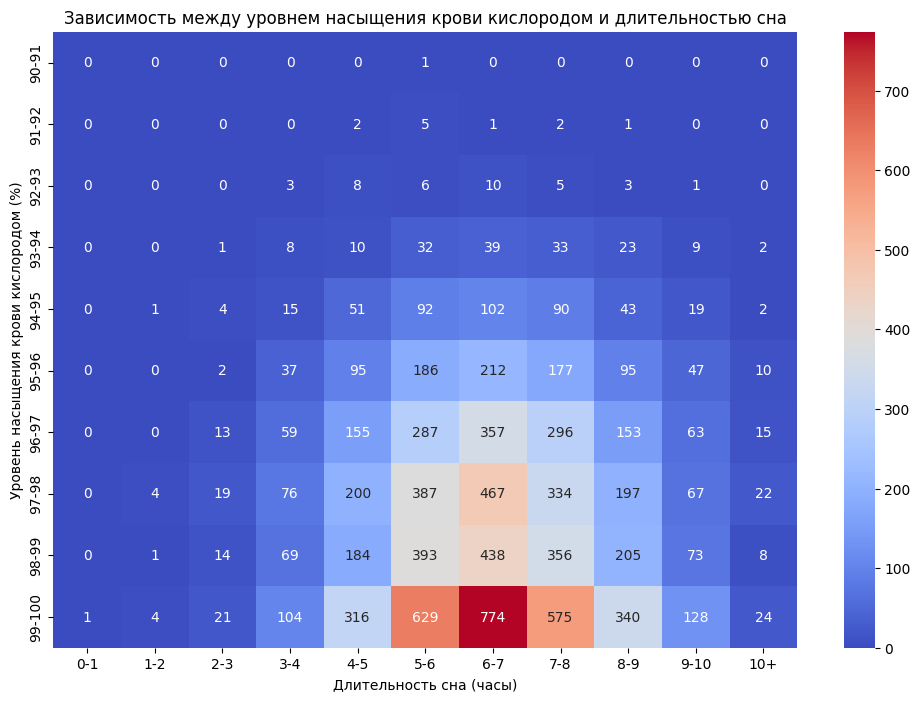

In [25]:
# Создание сводной таблицы
pivot_table = pd.pivot_table(
    df,  
    index="Blood Oxygen Level (%) Category",  # индекс сводной таблицы
    columns="Sleep Duration (hours) Category",    # столбец сводной таблицы
    aggfunc="size",     # подсчитывает количество записей для каждой комбинации
    fill_value=0,      # заполнитель пропущенных значений
    observed='True'    # рассматриваются только реальные категории
)
# Построение тепловой карты
plt.figure(figsize=(12, 8))     # задаёт размер графика в дюймах
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar=True)   # строит тепловую карту
plt.title("Зависимость между уровнем насыщения крови кислородом и длительностью сна")    # задает заголовок
plt.xlabel("Длительность сна (часы)")     # добавляет подпись к оси x
plt.ylabel("Уровень насыщения крови кислородом (%)")    # добавляет подпись к оси y
plt.show()   # отображает тепловую карту

**Вывод:** Тепловая карта наглядно демонстрирует, что большинство пользователей имеют нормальный уровень насыщения крови кислородом 96 – 98 % и спят часов 5 – 7 часов в сутки. Эти данные соответствуют физиологической норме и могут служить основой для рекомендаций по здоровому образу жизни. Аномальные значения требуют более детального изучения для выявления причин их возникновения.